In [20]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, classification_report
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [21]:
#reading data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!ls '/content/drive/MyDrive/Capstone/brain'

Testing  Training


In [23]:
train_folder = '/content/drive/MyDrive/Capstone/brain/Training'
test_folder = '/content/drive/MyDrive/Capstone/brain/Testing'

In [24]:
#function to read in the images and labels
def read_images(folder):
  images = []
  labels = []
  for tumor in os.listdir(folder): #gives a list of the files in this path - all the tumor folders
    tumor_path = os.path.join(folder, tumor) #gives us the path to each tumor folder
    if os.path.isdir(tumor_path): #if this is an existing path, then proceed
      for file in os.listdir(tumor_path): #list of the files in the tumor path - testing and training in each tumor file
        tumor_image_path = os.path.join(tumor_path, file) #getting the specific path to the images
        tumor_image = image.load_img(tumor_image_path, target_size=(224, 224)) #loading image and setting target size to reshape later
        images.append(image.img_to_array(tumor_image)) #adding all the images to the images list and converting the image to an array
        labels.append(tumor) #adding labels (names of tumors) to the labels list
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

In [25]:
#training data
X_train, y_train = read_images(train_folder)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

#testing data
X_test, y_test = read_images(test_folder)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

In [26]:
X_train.shape, y_train_encoded.shape

((5714, 224, 224, 3), (5714, 4))

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
#testing model 1 using Conv2D and MaxPooling layers
model1 = Sequential()

model1.add(Conv2D(32, 2, activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(2))
model1.add(Flatten())
model1.add(Dense(4, activation='softmax'))

In [29]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [30]:
history1 = model1.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=32, epochs=10)

Epoch 1/10
179/179 [==============================] - 7s 34ms/step - loss: 0.9280 - acc: 0.7616 - val_loss: 0.4067 - val_acc: 0.8696
Epoch 2/10
179/179 [==============================] - 5s 26ms/step - loss: 0.1753 - acc: 0.9415 - val_loss: 0.2058 - val_acc: 0.9352
Epoch 3/10
179/179 [==============================] - 5s 26ms/step - loss: 0.0706 - acc: 0.9834 - val_loss: 0.1861 - val_acc: 0.9382
Epoch 4/10
179/179 [==============================] - 5s 26ms/step - loss: 0.0304 - acc: 0.9946 - val_loss: 0.1831 - val_acc: 0.9390
Epoch 5/10
179/179 [==============================] - 5s 26ms/step - loss: 0.0121 - acc: 0.9997 - val_loss: 0.3488 - val_acc: 0.9069
Epoch 6/10
179/179 [==============================] - 5s 26ms/step - loss: 0.0089 - acc: 0.9991 - val_loss: 0.2217 - val_acc: 0.9367
Epoch 7/10
179/179 [==============================] - 5s 26ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.1699 - val_acc: 0.9519
Epoch 8/10
179/179 [==============================] - 5s 26ms/step - 

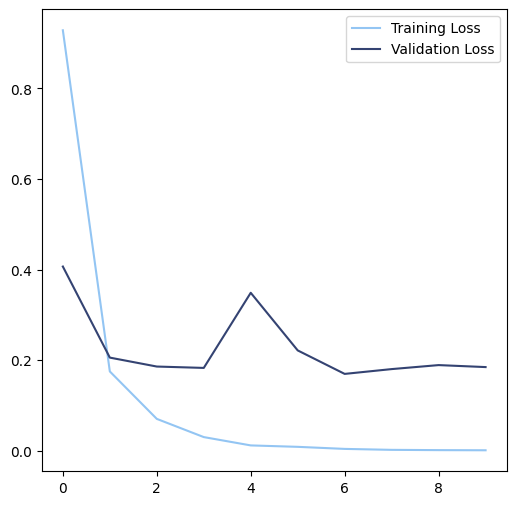

In [31]:
plt.figure(figsize=(6,6))
plt.plot(history1.history['loss'], c='#93C5F3', label='Training Loss')
plt.plot(history1.history['val_loss'], c='#344372', label='Validation Loss')
plt.legend();

In [32]:
model1.evaluate(X_test, y_test_encoded)

41/41 [==============================] - 1s 12ms/step - loss: 0.1849 - acc: 0.9512


[0.18489594757556915, 0.9511823058128357]

In [33]:
y_pred = model1.predict(X_test)
#y_pred

41/41 [==============================] - 0s 10ms/step


In [34]:
y_prediction = np.argmax(y_pred, axis=1)
y_prediction

array([2, 2, 0, ..., 2, 1, 2])

In [35]:
y_true = np.argmax(y_test_encoded.values, axis=1)
y_true

array([2, 2, 0, ..., 2, 1, 2])

In [36]:
matrix = confusion_matrix(y_true, y_prediction)
matrix

array([[272,  28,   0,   0],
       [ 19, 274,   8,   5],
       [  0,   0, 405,   0],
       [  1,   3,   0, 296]])

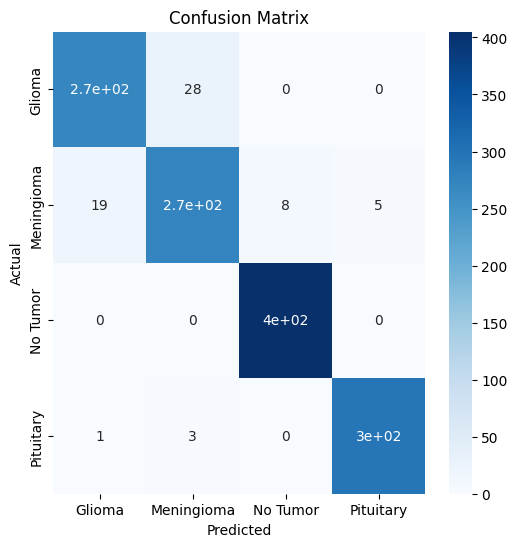

In [37]:
#plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], yticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
model1_precision = precision_score(y_true, y_prediction, average=None)
model1_precision

array([0.93150685, 0.89836066, 0.98062954, 0.9833887 ])

In [39]:
model1_accuracy = accuracy_score(y_true, y_prediction)
model1_accuracy

0.9511823035850496

In [40]:
model1_recall = recall_score(y_true, y_prediction, average=None)
model1_recall

array([0.90666667, 0.89542484, 1.        , 0.98666667])

In [41]:
model1_f1_score = f1_score(y_true, y_prediction, average=None)
model1_f1_score

array([0.91891892, 0.89689034, 0.99022005, 0.98502496])

In [42]:
#baseline scores
random_classifier = DummyClassifier(strategy="uniform")
random_classifier.fit(X_train, y_train_encoded)

DummyClassifier(strategy='uniform')

In [43]:
random_prediction = random_classifier.predict(X_test)

In [44]:
report = classification_report(y_test_encoded, random_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.22      0.49      0.31       300
           1       0.22      0.45      0.29       306
           2       0.32      0.51      0.39       405
           3       0.23      0.51      0.32       300

   micro avg       0.25      0.49      0.33      1311
   macro avg       0.25      0.49      0.33      1311
weighted avg       0.25      0.49      0.33      1311
 samples avg       0.23      0.49      0.30      1311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
